https://github.com/0liu/ISLR/blob/master/Chapter%204%20Classification.ipynb

### data
- 아 그냥 함수화 했으면 데이터랑 이름이랑 수준만 넣어서 값 얻었을 텐데, 이런.

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# import warnings
# from rpy2.robjects.packages import importr
# from rpy2.robjects.packages import data as rdata
# from rpy2.robjects import pandas2ri

import numpy as np
import scipy as sp
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix, classification_report

# from IPython.display import display
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
mpl.style.use("ggplot")
import statsmodels.graphics.api as smg

In [0]:
# islr = importr("ISLR")
# smarket_rdf = rdata(islr).fetch("Smarket")["Smarket"]
# smarket = pandas2ri.ri2py(smarket_rdf)
smarket = pd.read_csv("/content/drive/My Drive/ISLR/data/Smarket.csv", usecols = list(range(1,10)))

In [154]:
print(smarket.head())

   Year   Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today Direction
0  2001  0.381 -0.192 -2.624 -1.055  5.010  1.1913  0.959        Up
1  2001  0.959  0.381 -0.192 -2.624 -1.055  1.2965  1.032        Up
2  2001  1.032  0.959  0.381 -0.192 -2.624  1.4112 -0.623      Down
3  2001 -0.623  1.032  0.959  0.381 -0.192  1.2760  0.614        Up
4  2001  0.614 -0.623  1.032  0.959  0.381  1.2057  0.213        Up


In [155]:
print(smarket.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1250 non-null   int64  
 1   Lag1       1250 non-null   float64
 2   Lag2       1250 non-null   float64
 3   Lag3       1250 non-null   float64
 4   Lag4       1250 non-null   float64
 5   Lag5       1250 non-null   float64
 6   Volume     1250 non-null   float64
 7   Today      1250 non-null   float64
 8   Direction  1250 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 88.0+ KB
None


In [156]:
print(smarket.describe())

              Year         Lag1  ...       Volume        Today
count  1250.000000  1250.000000  ...  1250.000000  1250.000000
mean   2003.016000     0.003834  ...     1.478305     0.003138
std       1.409018     1.136299  ...     0.360357     1.136334
min    2001.000000    -4.922000  ...     0.356070    -4.922000
25%    2002.000000    -0.639500  ...     1.257400    -0.639500
50%    2003.000000     0.039000  ...     1.422950     0.038500
75%    2004.000000     0.596750  ...     1.641675     0.596750
max    2005.000000     5.733000  ...     3.152470     5.733000

[8 rows x 8 columns]


In [157]:
smarket.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


기본적인 정보 확인 및 변수 간 선형 관계 확인

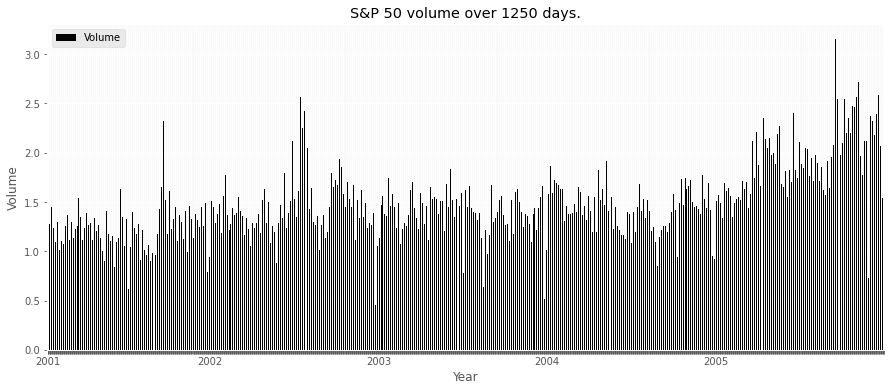

In [158]:
ax = smarket.plot("Year", "Volume", kind = "bar", figsize = (15,6), color = 'k')

# 데이터를 안 보고, year의 unique한 값으로 tick을 설정하고 싶었던 듯
xticklabels = ['',]*smarket.shape[0]
xtext, xlocs = np.unique(smarket.Year, return_index = True)
for t, i in zip(xtext, xlocs):
  xticklabels[i] = str(int(t))
ax.set_xticklabels(xticklabels, rotation = 0)

ax.set_ylabel("Volume")
ax.set_title("S&P 50 volume over 1250 days.")
plt.show()

### **LR: Logistic Regression**

> #### statsmodels module

In [159]:
smarket_glm = smf.glm("Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume", smarket,
                      family = sm.families.Binomial()).fit()
print("Deviance Redisuals:")
print(smarket_glm.resid_deviance.describe())
print(smarket_glm.summary())

Deviance Redisuals:
count    1250.000000
mean       -0.012030
std         1.176023
min        -1.325832
25%        -1.145081
50%        -1.065292
75%         1.203130
max         1.446343
dtype: float64
                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1250
Model:                                              GLM   Df Residuals:                     1243
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -863.79
Date:                                  Tue, 26 May 2020   Deviance:                       1727.6
Time:                                          19:54:07   Pearson chi2:                 1.25e+03
No. Iterations:      

In [160]:
print(f"    Null deviance: {round(smarket_glm.null_deviance, 1)} on",
      f"{smarket_glm.df_model + smarket_glm.df_resid} degrees of freedom")
print(f"Residual deviance: {round(smarket_glm.deviance, 1)} on {smarket_glm.df_resid} degrees of freedom")
print(f"AIC: {round(smarket_glm.aic, 2)}")

    Null deviance: 1731.2 on 1249 degrees of freedom
Residual deviance: 1727.6 on 1243 degrees of freedom
AIC: 1741.58


> #### scikit-learn Logistic Regression module
- 얘는 summary가 먹히질 않으므로 함수를 짜거나 만든 모형에 fitting에 이용한 데이터를 예측시켜 원래 값과 비교하는 식으로 모형의 설명력을 얻음.

In [161]:
X = smarket[["Lag1", "Lag2", "Lag3", "Lag4", "Lag5", "Volume"]]
y = smarket["Direction"]
logreg = LogisticRegression(C = 1e9)
logreg.fit(X, y)
print(logreg.intercept_, logreg.coef_)

[-0.12600781] [[-0.07307339 -0.04230074  0.01108552  0.00935968  0.01031339  0.13544567]]


In [162]:
print("First ten in-sample predection probabilities P(Y = 1 | X): ")
print(logreg.predict_proba(X)[0:10, 1])

First ten in-sample predection probabilities P(Y = 1 | X): 
[0.50708369 0.48146717 0.48113874 0.51522232 0.51078106 0.50695658
 0.49265099 0.5092293  0.51761327 0.48883779]


In [163]:
y_pred = logreg.predict(X)
print("In-sample prediction decision results: ")
print(y_pred[0:10])

In-sample prediction decision results: 
['Up' 'Down' 'Down' 'Up' 'Up' 'Up' 'Down' 'Up' 'Up' 'Down']


In [164]:
cfmat_cnames = pd.MultiIndex.from_product([["Predict"], logreg.classes_])
cfmat_index = pd.MultiIndex.from_product([["True"], logreg.classes_])
cfmat = confusion_matrix(y, y_pred, labels = logreg.classes_)
print("Confusion Matrix", pd.DataFrame(cfmat, columns = cfmat_cnames, index = cfmat_index), sep = "\n")
print("\nScore:", logreg.score(X, y))

Confusion Matrix
          Predict     
             Down   Up
True Down     145  457
     Up       141  507

Score: 0.5216


In [165]:
smarket_train = smarket[smarket.Year != 2005]
smarket_test = smarket[smarket.Year == 2005]
print("Training dataset shape: ", smarket_train.shape)
print("Test dataset shape: ", smarket_test.shape)

Training dataset shape:  (998, 9)
Test dataset shape:  (252, 9)


In [166]:
X = smarket_train[["Lag1", "Lag2", "Lag3", "Lag4", "Lag5", "Volume"]]
y = smarket_train["Direction"]
logreg = LogisticRegression(C = 1e9)  # Use a large C to disable regularization
logreg.fit(X, y)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [167]:
X = smarket_test[["Lag1", "Lag2", "Lag3", "Lag4", "Lag5", "Volume"]]
y = smarket_test["Direction"]
y_pred = logreg.predict(X)

cfmat_cnames = pd.MultiIndex.from_product([["Predict"], logreg.classes_])
cfmat_index = pd.MultiIndex.from_product([["True"], logreg.classes_])
cfmat = confusion_matrix(y, y_pred, labels = logreg.classes_)
print("Confusion Matrix", pd.DataFrame(cfmat, columns = cfmat_cnames, index = cfmat_index), sep = "\n")
print("\nScore:", logreg.score(X, y))

Confusion Matrix
          Predict    
             Down  Up
True Down      77  34
     Up        97  44

Score: 0.4801587301587302


In [168]:
X = smarket_train[["Lag1", "Lag2"]]
y = smarket_train["Direction"]
logreg = LogisticRegression(C = 1e9)  # Use a large C to disable regularization
logreg.fit(X, y)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [169]:
X = smarket_test[["Lag1", "Lag2"]]
y = smarket_test["Direction"]
y_pred = logreg.predict(X)

cfmat_cnames = pd.MultiIndex.from_product([["Predict"], logreg.classes_])
cfmat_index = pd.MultiIndex.from_product([["True"], logreg.classes_])
cfmat = confusion_matrix(y, y_pred, labels = logreg.classes_)
print("Confusion Matrix", pd.DataFrame(cfmat, columns = cfmat_cnames, index = cfmat_index), sep = "\n")
print("\nScore:", logreg.score(X, y))

Confusion Matrix
          Predict     
             Down   Up
True Down      35   76
     Up        35  106

Score: 0.5595238095238095


### **LDA: Linear Discriminant Analysis**

In [170]:
X = smarket_train[["Lag1", "Lag2"]]
y = smarket_train["Direction"]
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

예측되어야 할 값들, 즉 모수에 대하여

In [171]:
priors = pd.DataFrame(lda.priors_, index = lda.classes_, columns = ['']).T
print("Prior probabilities of groups\n", priors)

gmeans = pd.DataFrame(lda.means_, index = lda.classes_, columns = ['Lag1', 'Lag2'])
print("\nGroup means\n", gmeans)

coef = pd.DataFrame(lda.scalings_, columns = ["LD1"], index = ['Lag1', 'Lag2'])
print("\n", coef)

Prior probabilities of groups
       Down        Up
  0.491984  0.508016

Group means
           Lag1      Lag2
Down  0.042790  0.033894
Up   -0.039546 -0.031325

            LD1
Lag1 -0.642019
Lag2 -0.513529


In [0]:
smarket_grouped = smarket_train.groupby("Direction")
smarket_down = smarket_grouped.get_group("Down")
smarket_up = smarket_grouped.get_group("Up")

discrim_down = lda.transform(smarket_down[['Lag1', 'Lag2']])
discrim_up = lda.transform(smarket_up[['Lag1', 'Lag2']])

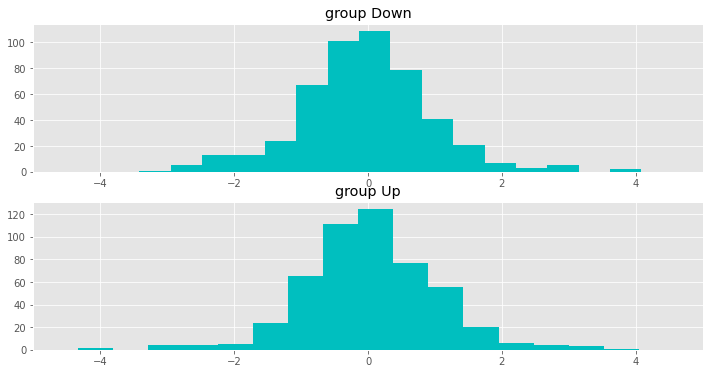

In [173]:
# normed = True 제거, 아마도 정규분포나 그게 준하는 것은 선을 준다거나 하는 식으로 plot에 무언가 추가되었었나 봄.
plt.figure(figsize = (12, 6))
plt.subplot(2, 1, 1)
plt.hist(discrim_down, 16, color = 'c')
plt.title("group Down")
plt.xlim(-5, 5)

plt.subplot(2, 1, 2)
plt.hist(discrim_up, 16, color = 'c')
plt.title("group Up")
plt.xlim(-5, 5)
plt.show()

본격적인 예측

In [0]:
X = smarket_test[["Lag1", "Lag2"]]
y = smarket_test["Direction"]
y_pred = lda.predict(X)

posterior = pd.DataFrame(lda.predict_proba(X), columns = lda.classes_)
discrim_test = lda.transform(X)

In [175]:
cfmat_cnames = pd.MultiIndex.from_product([["Predict"], lda.classes_])
cfmat_index = pd.MultiIndex.from_product([["True"], lda.classes_])
cfmat = confusion_matrix(y, y_pred, labels = lda.classes_)
print("Confusion Matrix", pd.DataFrame(cfmat, columns = cfmat_cnames, index = cfmat_index), sep = "\n")
print("\nScore:", lda.score(X, y))

Confusion Matrix
          Predict     
             Down   Up
True Down      35   76
     Up        35  106

Score: 0.5595238095238095


In [176]:
print("Posterior probabilities\n", posterior.iloc[:20])
print("\nFirst 20 prediction results: \n", y_pred[:20])
print("\nNumber of Down class with threshold = 0.9: ", sum(posterior["Down"] > 0.9))

Posterior probabilities
         Down        Up
0   0.490179  0.509821
1   0.479218  0.520782
2   0.466818  0.533182
3   0.474001  0.525999
4   0.492788  0.507212
5   0.493856  0.506144
6   0.495102  0.504898
7   0.487286  0.512714
8   0.490701  0.509299
9   0.484403  0.515597
10  0.490696  0.509304
11  0.511999  0.488001
12  0.489515  0.510485
13  0.470676  0.529324
14  0.474459  0.525541
15  0.479958  0.520042
16  0.493578  0.506422
17  0.503089  0.496911
18  0.497881  0.502119
19  0.488633  0.511367

First 20 prediction results: 
 ['Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Down' 'Up' 'Up'
 'Up' 'Up' 'Up' 'Down' 'Up' 'Up']

Number of Down class with threshold = 0.9:  0


### **QDA: Quadratic Discriminant Analysis**

In [177]:
X = smarket_train[["Lag1", "Lag2"]]
y = smarket_train["Direction"]
qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [178]:
priors = pd.DataFrame(qda.priors_, index = qda.classes_, columns = ['']).T
print("Prior probabilities of groups\n", priors)

gmeans = pd.DataFrame(qda.means_, index = qda.classes_, columns = ['Lag1', 'Lag2'])
print("\nGroup means\n", gmeans)

coef = pd.DataFrame(qda.scalings_, columns = ["QD1", "QD2"], index = ['Lag1', 'Lag2'])
print("\nCoefficients of quadratic discriminants\n", coef)

Prior probabilities of groups
       Down        Up
  0.491984  0.508016

Group means
           Lag1      Lag2
Down  0.042790  0.033894
Up   -0.039546 -0.031325

Coefficients of quadratic discriminants
            QD1       QD2
Lag1  1.562945  1.479273
Lag2  1.534551  1.472723


In [0]:
X = smarket_test[["Lag1", "Lag2"]]
y = smarket_test["Direction"]
y_pred = qda.predict(X)

In [180]:
cfmat_cnames = pd.MultiIndex.from_product([["Predict"], qda.classes_])
cfmat_index = pd.MultiIndex.from_product([["True"], qda.classes_])
cfmat = confusion_matrix(y, y_pred, labels = qda.classes_)
print("Confusion Matrix", pd.DataFrame(cfmat, columns = cfmat_cnames, index = cfmat_index), sep = "\n")
print("\nScore:", qda.score(X, y))

Confusion Matrix
          Predict     
             Down   Up
True Down      30   81
     Up        20  121

Score: 0.5992063492063492


### **KNN: K-Nearest Neighbors**

> #### 수준 1

In [181]:
X = smarket_train[["Lag1", "Lag2"]]
y = smarket_train["Direction"]
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
X = smarket_test[["Lag1", "Lag2"]]
y = smarket_test["Direction"]
y_pred = knn.predict(X)

In [183]:
cfmat_cnames = pd.MultiIndex.from_product([["Predict"], knn.classes_])
cfmat_index = pd.MultiIndex.from_product([["True"], knn.classes_])
cfmat = confusion_matrix(y, y_pred, labels = knn.classes_)
print("Confusion Matrix", pd.DataFrame(cfmat, columns = cfmat_cnames, index = cfmat_index), sep = "\n")
print("\nScore:", knn.score(X, y))

Confusion Matrix
          Predict    
             Down  Up
True Down      43  68
     Up        58  83

Score: 0.5


> #### 수준 3

In [184]:
X = smarket_train[["Lag1", "Lag2"]]
y = smarket_train["Direction"]
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
X = smarket_test[["Lag1", "Lag2"]]
y = smarket_test["Direction"]
y_pred = knn.predict(X)

In [186]:
cfmat_cnames = pd.MultiIndex.from_product([["Predict"], knn.classes_])
cfmat_index = pd.MultiIndex.from_product([["True"], knn.classes_])
cfmat = confusion_matrix(y, y_pred, labels = knn.classes_)
print("Confusion Matrix", pd.DataFrame(cfmat, columns = cfmat_cnames, index = cfmat_index), sep = "\n")
print("\nScore:", knn.score(X, y))

Confusion Matrix
          Predict    
             Down  Up
True Down      48  63
     Up        55  86

Score: 0.5317460317460317


### **data: Caravan Insurance**

> #### data

In [0]:
caravan = pd.read_csv("/content/drive/My Drive/ISLR/data/Caravan.csv", usecols = list(range(1,87)))

In [188]:
caravan.head(10)

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,...,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,...,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,...,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,...,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
5,23,1,2,1,5,0,5,0,5,0,6,3,3,5,2,0,5,4,2,0,0,4,2,2,2,2,2,4,2,9,0,5,3,3,9,0,5,2,3,0,...,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,No
6,39,2,3,2,9,2,2,0,5,7,2,0,0,3,6,0,4,5,0,0,0,4,1,5,0,1,4,5,0,6,3,8,0,1,9,0,4,3,3,0,...,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,No
7,33,1,2,3,8,0,7,0,2,7,2,0,0,5,4,0,3,6,2,0,0,2,5,2,2,1,2,5,2,0,9,4,4,2,6,3,2,5,3,0,...,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,No
8,33,1,2,4,8,0,1,3,6,6,0,3,3,3,3,0,1,8,1,1,0,1,8,1,1,1,0,8,1,9,0,5,2,3,7,2,7,2,1,0,...,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,No
9,11,2,3,3,3,3,5,0,2,7,0,2,2,2,6,0,4,5,2,0,0,3,3,3,1,2,1,4,2,0,9,6,1,2,6,3,2,3,3,1,...,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No


In [189]:
caravan["Purchase"].value_counts()

No     5474
Yes     348
Name: Purchase, dtype: int64

In [0]:
X_scaled = scale(caravan[caravan.columns[0:85]])
X_train = X_scaled[1000:]
y_train = caravan["Purchase"][1000:]
X_test = X_scaled[:1000]
y_test = caravan["Purchase"][:1000]

In [191]:
print("Training features shape: ", X_train.shape)
print("Test features shape: ", X_test.shape)

Training features shape:  (4822, 85)
Test features shape:  (1000, 85)


> #### LR

In [192]:
logreg = LogisticRegression(C = 1e9)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [193]:
cfmat_cnames = pd.MultiIndex.from_product([["Predict"], logreg.classes_])
cfmat_index = pd.MultiIndex.from_product([["True"], logreg.classes_])
cfmat = confusion_matrix(y_test, y_pred, labels = logreg.classes_)
print("Confusion Matrix", pd.DataFrame(cfmat, columns = cfmat_cnames, index = cfmat_index), sep = "\n")
print("\nClassification Report\n", classification_report(y_test, y_pred, digits = 3))

Confusion Matrix
         Predict    
              No Yes
True No      935   6
     Yes      59   0

Classification Report
               precision    recall  f1-score   support

          No      0.941     0.994     0.966       941
         Yes      0.000     0.000     0.000        59

    accuracy                          0.935      1000
   macro avg      0.470     0.497     0.483      1000
weighted avg      0.885     0.935     0.909      1000



threshold를 크게 하면 기준이 너무 높아서 가능한 데이터가 없음.

높은 가능성 자체가 힘든 값이어서 일정 수준을 넘으면 가능성이 높음으로 해석하자.

threshold = 0.25

In [0]:
posterior = logreg.predict_proba(X_test)
Yes_idx = np.where(logreg.classes_ == "Yes")[0][0]
y_pred = pd.Series(posterior[:, Yes_idx] > 0.25)
y_pred.replace([True, False], ["Yes", "No"], inplace = True)

In [195]:
cfmat = confusion_matrix(y_test, y_pred, labels = logreg.classes_)
print("Confusion Matrix", pd.DataFrame(cfmat, columns = cfmat_cnames, index = cfmat_index), sep = "\n")
print("\nClassification Report\n", classification_report(y_test, y_pred, digits = 3))

Confusion Matrix
         Predict    
              No Yes
True No      918  23
     Yes      48  11

Classification Report
               precision    recall  f1-score   support

          No      0.950     0.976     0.963       941
         Yes      0.324     0.186     0.237        59

    accuracy                          0.929      1000
   macro avg      0.637     0.581     0.600      1000
weighted avg      0.913     0.929     0.920      1000



> #### KNN 1, 3, 5 연속해서 만들기

In [196]:
for K in (1, 3, 5):
  print(f"\n======================================================\nK = {K}")
  knn = KNeighborsClassifier(n_neighbors = K)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)

  cfmat_cnames = pd.MultiIndex.from_product([["Predict"], knn.classes_])
  cfmat_index = pd.MultiIndex.from_product([["True"], knn.classes_])
  cfmat = confusion_matrix(y_test, y_pred, labels = knn.classes_)
  print("Confusion Matrix", pd.DataFrame(cfmat, columns = cfmat_cnames, index = cfmat_index), sep = "\n")
  print("\nScore:", knn.score(X_test, y_test))
  print("\nClassification Report\n", classification_report(y_test, y_pred, digits = 3))


K = 1
Confusion Matrix
         Predict    
              No Yes
True No      873  68
     Yes      50   9

Score: 0.882

Classification Report
               precision    recall  f1-score   support

          No      0.946     0.928     0.937       941
         Yes      0.117     0.153     0.132        59

    accuracy                          0.882      1000
   macro avg      0.531     0.540     0.535      1000
weighted avg      0.897     0.882     0.889      1000


K = 3
Confusion Matrix
         Predict    
              No Yes
True No      921  20
     Yes      54   5

Score: 0.926

Classification Report
               precision    recall  f1-score   support

          No      0.945     0.979     0.961       941
         Yes      0.200     0.085     0.119        59

    accuracy                          0.926      1000
   macro avg      0.572     0.532     0.540      1000
weighted avg      0.901     0.926     0.912      1000


K = 5
Confusion Matrix
         Predict    
         